*COSC2002 Assignment*  
*Student ID: 480048691*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Question 1

## Setting up the classes World and Person

In [45]:
class World:
    def __init__(self, sidelength = 40, maxtime = 1000, npeople = 100, recovery = 0):
        self.sidelength = sidelength
        self.maxtime = maxtime
        self.npeople = npeople
        self.recovery = recovery
        
        people = self.set_up_people()
        self.people = people
        
        self.infected_num = 1
        self.healthy_num = npeople-1
        self.recovered_num = 0
        
    def set_up_people(self):
        people = []
        
        #set up one infected person
        [xpos, ypos] = np.random.randint(1, self.sidelength+1, 2)
        P = Person(xpos, ypos, 1)
        people.append(P)
        
        #set up random healthy people
        i = 1
        while i < self.npeople:
            [xpos, ypos] = np.random.randint(1, self.sidelength+1, 2)
            P = Person(xpos, ypos, 0)
            people.append(P)
            i += 1
        
        return people
    
    def get_npeople(self):
        return self.npeople

    def handle_infection(self):
        infected = []
        healthy = []
        
        for person in self.people:
            person_health = person.get_healthState()
            if person_health == 1:
                infected.append(person)
            else:
                healthy.append(person)
                
        for patient in infected:
            xpos, ypos = patient.get_position()
            for p in healthy:
                p_health = p.get_healthState()
                xpos2, ypos2 = p.get_position()
                
                if xpos == xpos2 and ypos == ypos2: #at the same coordinates
                    if p_health == 0: #if not already recovered
                        p.set_healthState(1) # the person is now infected
                        self.infected_num += 1
                        self.healthy_num -= 1
                
        for case in infected:
            update = recover_or_not(self.recovery)
            if update == 1:
                case.set_healthState(2) #person is recovered
                self.recovered_num += 1
                self.infected_num -= 1        
                
    def step(self):
        for person in self.people:
            person.move(self.sidelength)
        self.handle_infection()
    
    def population_info(self):
        return self.infected_num, self.healthy_num, self.recovered_num
    
    def simulate(self, time):
        for i in range(time):
            self.step()
            
        infected = ([],[])
        suscept = ([], [])
        recovered = ([],[])
        
        for person in self.people:
            health_state = person.get_healthState()
            xpos, ypos = person.get_position()
            if health_state == 0:
                suscept[0].append(xpos)
                suscept[1].append(ypos)
            elif health_state == 1:
                infected[0].append(xpos)
                infected[1].append(ypos)
            else:
                recovered[0].append(xpos)
                recovered[1].append(ypos)
                
        data = (infected,suscept,recovered)
        colors = ('red', 'blue', 'green')
        groups = ('Infected', 'Susceptible', 'Recovered')
        
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        
        for data, color, group in zip(data, colors, groups):
            x, y = data
            ax.scatter(x, y, alpha = 0.8, c = color, 
                       edgecolors = 'none', s = 10, label = group)

        plt.title('Day {} since first infection'.format(time))
        plt.xlim([-1, self.sidelength+1])
        plt.ylim([-1, self.sidelength+1])
        plt.legend(bbox_to_anchor = (1.04,1), loc = "upper left")
        plt.show()
        
    def time_to_last_infected(self):
        day = 0
        while self.healthy_num > 0:
            if day > self.maxtime:
                return None
            self.step()
            day += 1
        return day
    
    def max_infection(self):
        day = 0
        max_infected = self.infected_num
        max_day = 0
        peak_infection = 0
        
        while day < self.maxtime:
            if self.recovered_num == 0.6 * self.npeople:
                return peak_infection
            self.step()
            if self.infected_num > max_infected:
                max_infected = self.infected_num
                peak_infection = self.infected_num / self.npeople
                max_day = day
            day += 1
            
        return peak_infection
    
    def total_fraction(self):
        for i in range(self.maxtime):
            self.step()
            
        total = self.infected_num + self.recovered_num
        return total / self.npeople

In [3]:
class Person:
    def __init__(self, xpos, ypos, healthy):
        self.xpos = xpos
        self.ypos = ypos
        self.healthy = healthy #0 = healthy, 1 = infected, 2 = recovered
        
    def get_healthState(self):
        return self.healthy
    
    def set_healthState(self, healthState):
        self.healthy = healthState
    
    def get_position(self):
        return self.xpos, self.ypos
        
    def move(self, sidelength):
        [move_x, move_y] = np.random.randint(-1, 2, 2)
        
        new_x, new_y = move_decision(move_x, move_y, self.xpos, self.ypos, sidelength)
        self.xpos = new_x
        self.ypos = new_y

In [4]:
def move_decision(nx, ny, xpos, ypos, sidelength):
    new_x = xpos + nx
    new_y = ypos + ny
        
    if new_x < 1:
        new_x = sidelength - 1
    elif new_x > sidelength:
        new_x = 1
    
    if new_y < 1:
        new_y = sidelength - 1
    elif new_y > sidelength:
        new_y = 1
    
    return (new_x, new_y)

In [5]:
def recover_or_not(prob):
    p_one = prob
    p_zero = 1 - prob
    state = np.random.choice([0, 1], p = [p_zero, p_one])
    return state

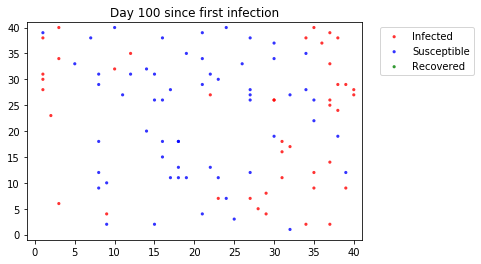

In [114]:
W = World()

day_simulate = 100
W.simulate(day_simulate)

In [7]:
nexp = 50
days_to_last_infected = np.zeros(nexp)

for i in range(nexp):
    W = World()
    
    day = W.time_to_last_infected()
    
    days_to_last_infected[i] = day  

In [8]:
print(np.mean(days_to_last_infected))
print(np.std(days_to_last_infected))

289.54
38.236741492967205


Running the experiment 50 times, it appears that the average length of time until the last person gets infected is 296.1 days with a standard deviation of 39.66 days, assuming there is no recovery. 

## 1.2. Plot the number of infected people as a function of time

In [11]:
maxtime = 1000
nexp = 30
no_recovery_exp = np.zeros([maxtime, nexp]) #rows = 1000, columns: nexp 

i = 0
while i < nexp:
    j = 0
    W = World()
    while j < maxtime:
        infected = W.population_info()[0]
        no_recovery_exp[j][i] = infected
        W.step()
        j += 1
    i += 1

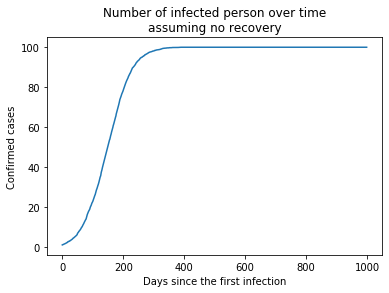

In [12]:
avg = np.zeros(maxtime)

for i in range(maxtime):
    average = np.mean(no_recovery_exp[i,:])
    avg[i] = average

time = np.arange(0, maxtime, 1)
plt.xlabel('Days since the first infection')
plt.ylabel('Confirmed cases')
plt.title('Number of infected person over time\nassuming no recovery')
plt.plot(time, avg)
plt.show()

## 1.3. Halve the size of the world

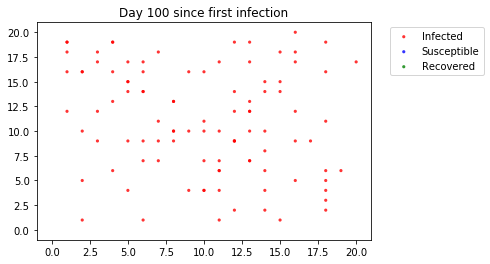

In [112]:
W = World(sidelength = 20)

W.simulate(100)

In [19]:
nexp = 50
halve_size_days = np.zeros(nexp)

for i in range(nexp):
    W = World(sidelength = 20)
    day = W.time_to_last_infected()
    halve_size_days[i] = day

In [20]:
print(np.mean(halve_size_days))
print(np.std(halve_size_days))

71.26
12.967359021790056


It appears that if the size of the world is smaller, it will take much faster until the last person gets infected. Running the experiment 50 times, we notice that it takes an average of 68.2 $\pm$ 9.54 days until the last person gets infected. This is much faster comparing to our earlier numbers (296.1 $\pm$ 39.66 days). 

This implies that when there is less physical distance between agents, the spread of the disease is slower as those who are infected have a lower chance of spreading to those who are susceptible. 

These numbers have a great real-world implications as they confirm that stay at home orders and movement restrictions do help reduce the spread of diseases greatly.

## 1.4. Allow recovery

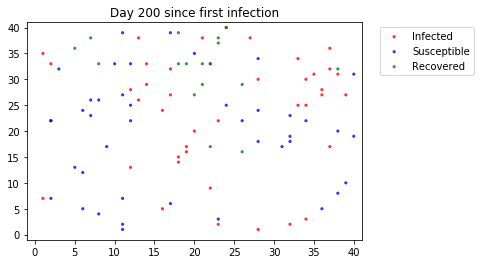

In [116]:
W = World(recovery = 0.01)

W.simulate(200)

In [32]:
maxtime = 1000
nexp = 30
recovery_exp = np.zeros([maxtime, nexp]) #rows = at most 1000, columns: nexp = 100

i = 0
while i < nexp:
    j = 0
    W = World(recovery = 0.01)
    while j < maxtime:
        infected = W.population_info()[0]
        recovery_exp[j][i] = infected
        W.step()
        j += 1
    i += 1

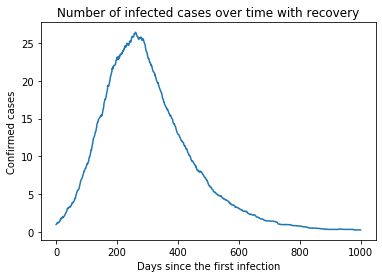

In [34]:
avg = np.zeros(maxtime)

for i in range(maxtime):
    average = np.mean(recovery_exp[i,:])
    avg[i] = average

time = np.arange(0, maxtime, 1)
plt.xlabel('Days since the first infection')
plt.ylabel('Confirmed cases')
plt.title('Number of infected cases over time with recovery')
plt.plot(time, avg)
plt.show()

By averaging over 30 experiments, we can see that when recovery is allowed, the number of infected people will decrease after reaching a peak as those who were already infected got recovered and the disease dies out before reaching those who are yet resistant.

### Representative case

In [37]:
maxtime = 1000
infected = np.zeros(maxtime)
recovered = np.zeros(maxtime)
healthy = np.zeros(maxtime)
days = np.arange(1, maxtime+1, 1)

W = World(recovery = 0.01)
for i in range(maxtime):
    W.step()
    inf_num, health, recover = W.population_info()

    infected[i] = inf_num
    healthy[i] = health
    recovered[i] = recover

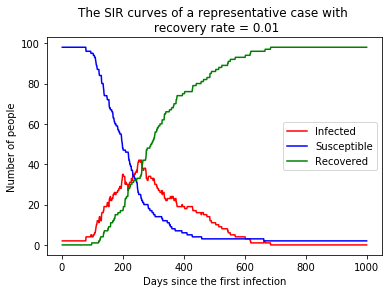

In [111]:
plt.plot(days, infected, c = 'red', label = 'Infected')
plt.plot(days, healthy, c = 'blue', label = 'Susceptible')
plt.plot(days, recovered, c = 'green', label = 'Recovered')
plt.legend()
plt.title('The SIR curves of a representative case with \n recovery rate = 0.01')
plt.ylabel('Number of people')
plt.xlabel('Days since the first infection')
plt.show()

**Note:** If there happens to be 3 straight lines, meaning the infected person at the start has recovered quickly and the virus dies out before reaching the remaining population. Please run again. 

## 1.5.1. Average infection peak fraction as a function of the recovery parameter

In [39]:
def avg_infection_peak(nexp, recovery_rate):
    infection_peak = np.zeros(nexp)

    for i in range(nexp):
        W = World(recovery = recovery_rate)
        infection_peak[i] = W.max_infection()
        
    return np.mean(infection_peak)

In [54]:
nexp = 50
recovery_rate = 0.01

avg = avg_infection_peak(nexp, recovery_rate)
    
print("The average infection peak fraction is: {:.2f}".format(avg))

The average infection peak fraction is: 0.33


By running the experiment 50 times, we learned that the average infection peak for a recovery rate of 0.01 is 0.31. This implies that during peak infection, approximately 30% of the population were infected with the disease. 

In [64]:
nexp = 10
r_ls = [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04]
avg_peak_fraction = np.zeros(len(r_ls))


In [65]:
i = 0
while i < len(r_ls):
    avg_peak_fraction[i] = avg_infection_peak(nexp, r_ls[i])
    i += 1

In [88]:
print(avg_peak_fraction)

[0.328 0.116 0.104 0.063 0.046 0.024 0.015]


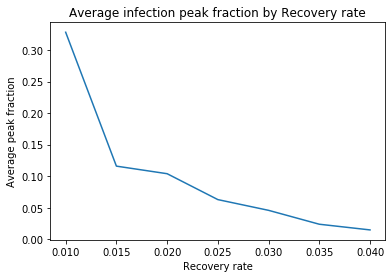

In [87]:
plt.plot(r_ls, avg_peak_fraction)
plt.xlabel('Recovery rate')
plt.ylabel('Average peak fraction')
plt.title('Average infection peak fraction by Recovery rate')
plt.show()

By running the experiments many times with recovery rates ranging from 0.01 to 0.04, it appears that the average peak fraction decreases quickly as the recovery rate approaches 0.04. Indeed, from before we have seen that during infection peak, over 30% of the population are infected by the virus assuming r = 0.01. Increasing this number to r = 0.015 and we see the peak infection fraction reduces to 11.6% (on average), which is a reduction of more than 50%. 

## 1.5.2. Plot the average total fraction who end up being infected as a function of the recovery parameter

In [49]:
def avg_total_frac(nexp, recovery_rate):
    total_infection_fraction = np.zeros(nexp)
    
    for i in range(nexp):
        W = World(recovery = recovery_rate)
        inf_frac = W.total_fraction()
        total_infection_fraction[i] = inf_frac
    return np.mean(total_infection_fraction)

In [50]:
nexp = 50
recovery_rate = 0.01

avg_total = avg_total_frac(nexp, recovery_rate)
    
print("The average total infection fraction is: {:.2f}".format(np.mean(avg_total)))

The average total infection fraction is: 0.78


Running the experiment 50 times with a recovery rate of 0.01, it appears that on average 78% of the population ends up being infected over the course of an epidemic (that is by day 1000, the number of those who are infected and those who have recovered will add up to approximately 78% of the total population).

In [67]:
nexp = 10
r_ls = [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04]
avg_total_multiple_rs = np.zeros(len(r_ls))

In [68]:
i = 0
while i < len(r_ls):
    avg_total_multiple_rs[i] = avg_total_frac(nexp, r_ls[i])
    i += 1

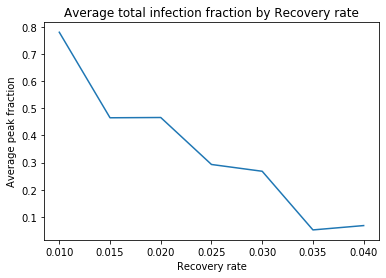

In [69]:
plt.plot(r_ls, avg_total_multiple_rs)
plt.xlabel('Recovery rate')
plt.ylabel('Average peak fraction')
plt.title('Average total infection fraction by Recovery rate')
plt.show()

In [70]:
print(avg_total_multiple_rs)

[0.78  0.465 0.466 0.293 0.268 0.052 0.068]


Once again, we can see a small change of the $R_0$ value can reduce the average total fraction of infected people greatly. For example, with the recovery rate of 0.01, we see that by the time the virus dies out, on average 78% of the population has been exposed to the disease. Increasing this number to 0.015 and the toal infection fraction reduces to 46.5%. 

This analysis can provide us important insights to the effect of social distancing measures. Since the $R_0$ number refers to number of people each person can infects, by the increasing the physical distance between each agents (making the grid larger) or imposing movement restrictions (have agents move more slowly), we are effectively reducing the $R_0$ value, which in turns increase the recovery rate. 

A clearer image is provided below as we compare the number of infections between scenarios where there is no protective measure (for simplicity, we let the recovery rate of this example is 0.01) and where there is protective measure (lower $R_0$, recovery rate = 0.02).

In [94]:
maxtime = 1000
infected_1 = np.zeros(maxtime)


W = World(recovery = 0.01)
for i in range(maxtime):
    W.step()
    inf_num = W.population_info()[0]

    infected_1[i] = inf_num

In [104]:
infected_flatten = np.zeros(maxtime)

W2 = World(recovery = 0.02)
for i in range(maxtime):
    W2.step()
    inf_num = W2.population_info()[0]

    infected_flatten[i] = inf_num

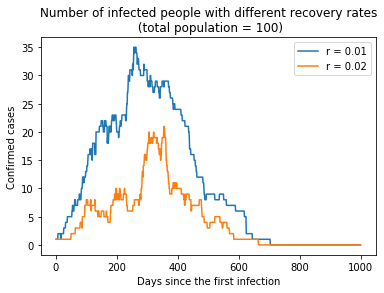

In [109]:
days = np.arange(1, maxtime+1, 1)

plt.plot(days, infected_1, label = "r = 0.01")
plt.plot(days, infected_flatten, label = "r = 0.02")
plt.legend()
plt.title('Number of infected people with different recovery rates\n (total population = 100)')
plt.xlabel('Days since the first infection')
plt.ylabel('Confirmed cases')
plt.show()

**Note:** If there happens to be a straight line, meaning the infected person at the start has recovered quickly and the virus dies out before reaching the remaining population. Please run again. 

# Question 2

## Bus, Person, Schedule classes

In [2]:
class Bus:
    def __init__(self, arrive_time):
        self.arrive_time = arrive_time
        self.people = []
        
    def add_passenger(self, p):
        self.people.append(p)
        
    def get_arrive_time(self):
        return self.arrive_time

In [3]:
class Person:
    def __init__(self, arrive_time, pick_up):
        self.arrive_time = arrive_time
        self.pick_up = pick_up
        self.wait_time = 0
        
    def picked_up(self):
        self.pick_up = True
        
    def get_at(self):
        return self.arrive_time
    
    def get_picked_up(self):
        return self.pick_up
    
    def get_wait_time(self):
        return self.wait_time
    
    def set_wait_time(self, wt):
        self.wait_time = wt

In [6]:
class Schedule:
    def __init__(self, nbus, model, x = 0, std = 0):
        self.nbus = nbus
        self.x = x
        self.std = std
        buses = self.set_up_buses(model)
        self.buses = buses
        
        people = self.set_up_people()
        self.people = people
        self.model = model
        
    def set_up_buses(self, model):
        buses = []
        
        if model == 1:
            Tn = self.nbus * 10
            schedule = np.random.uniform(0, Tn, size = self.nbus)
        
            for s in sorted(schedule):
                B = Bus(s)
                buses.append(B)
                
        else:
            time = 0
            i = 0
            
            while i < self.nbus:
                if model == 2:
                    late = np.random.uniform(-self.x, self.x)
                elif model == 3:
                    late = np.random.normal(0, self.std)
                    
                arrive_time = time + late
                B = Bus(arrive_time)
                buses.append(B)
                time += 10
                i += 1
        return buses

    def set_up_people(self):
        npeople_per_bus = np.random.randint(5, 11)
        npeople_total = npeople_per_bus * self.nbus
        
        people = []
        tmax = self.buses[-1].get_arrive_time()
        
        people_arrive_times = np.random.uniform(0, tmax, size = npeople_total)
        
        for i in sorted(people_arrive_times):
            P = Person(i, False)
            people.append(P)
        
        return people
    
    def get_schedule(self):
        schedule = np.zeros(self.nbus)
        for i in range(len(schedule)):
            schedule[i] = self.buses[i].get_arrive_time()
        return schedule
            
    def get_people_arrive_time(self):
        pat = []
        
        for p in self.people:
            pat.append(p.get_at())
        return pat
    
    def pickup(self, bus, people):
        for p in people:
            if not p.get_picked_up() and p.get_at() <= bus.get_arrive_time():
                bus.add_passenger(p)
                p.picked_up()
                p.set_wait_time(bus.get_arrive_time() - p.get_at())
                
    def average_waiting_time(self):
        total = 0
        for bus in self.buses:
            self.pickup(bus, self.people)
            
        for p in self.people:
            total += p.get_wait_time()
            
        return total / len(self.people)
    
    def get_intervals(self):
        interval = []
        i = 1
        while i < len(self.buses):
            interval.append(self.buses[i].get_arrive_time() - self.buses[i-1].get_arrive_time())
            i += 1
        return interval
    
    def average_interval(self):
        interval = self.get_intervals()
        return np.mean(interval)

## 2.1.

### i) Confirm that the average interval between buses in each case is 10 minutes

In [183]:
nbus = 1000
x = 5
std = 4

### Model 1

In [184]:
print("The average intervals between buses arrival are:")
print()

S1 = Schedule(nbus, model = 1)
print("Model 1: {:.4f} minutes".format(S1.average_interval()))
      
S2 = Schedule(nbus, model = 2, x = x)
print("Model 2: {:.4f} minutes".format(S2.average_interval()))

S3 = Schedule(nbus, model = 3, std = std)
print("Model 3: {:.4f} minutes".format(S1.average_interval()))

The average intervals between buses arrival are:

Model 1: 9.9944 minutes
Model 2: 9.9985 minutes
Model 3: 9.9944 minutes


## ii) Determine the average waiting time for people

In [186]:
print("The average waiting time for people are:")
print()
print("Model 1: {:.4f} minutes".format(S1.average_waiting_time()))
print("Model 2: {:.4f} minutes".format(S2.average_waiting_time()))
print("Model 3: {:.4f} minutes".format(S3.average_waiting_time()))

The average waiting time for people are:

Model 1: 9.9425 minutes
Model 2: 5.7401 minutes
Model 3: 6.3756 minutes


## iii) Plot a histogram of the interval between bus arrivals

### Model 1

In [12]:
nbus = 100000

S1 = Schedule(nbus, model = 1)
intv = S1.get_intervals()

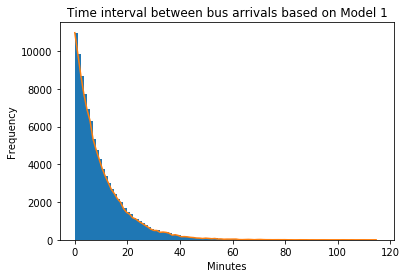

In [15]:
itv_range = np.linspace(min(intv),max(intv),101)

[y,x,patches]=plt.hist(intv, bins=itv_range)

plt.plot(x[:-1],y)
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.title('Time interval between bus arrivals based on Model 1')
plt.show()

It appears that the distribution of the time interval between bus arrivals based on model 1 follows a power law distribution. Indeed, we can confirm this observation by plotting the log-log plot as belows:

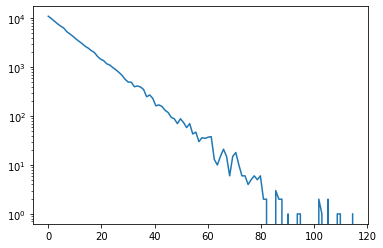

In [16]:
plt.semilogy(x[:-1],y)
plt.show()

### Model 2

In [17]:
nbus = 100000

S2 = Schedule(nbus, model = 2, x = 5)
intv2 = S2.get_intervals()

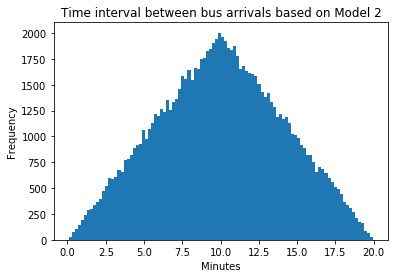

In [18]:
plt.hist(intv2, bins = 100)
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.title('Time interval between bus arrivals based on Model 2')
plt.show()

It appears that the distribution of the time interval between bus arrivals based on model 2 follows a normal distribution.

### Model 3

In [24]:
nbus = 1000000
S3 = Schedule(100, model = 3, std = 4)
intv3 = S3.get_intervals()

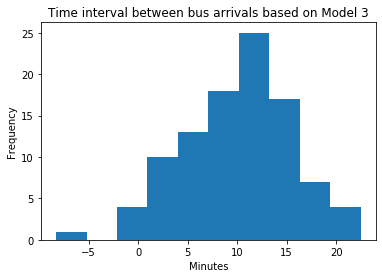

In [25]:
plt.hist(intv3, bins = 10)
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.title('Time interval between bus arrivals based on Model 3')
plt.show()

It appears that the distribution of the time interval between bus arrivals based on model 3 also follows a normal distribution.

## 2.2. How does the estimate of average wait time depend on x (for Model 2) and $\sigma$  (for Model 3)

### Model 2

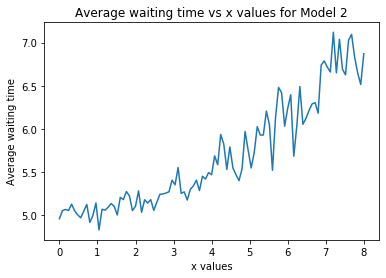

In [28]:
x_ls = np.linspace(0, 8, 101)
avg_wt2 = np.zeros(len(x_ls))
nbus = 100

i = 0
while i < len(x_ls):
    S2 = Schedule(nbus, model = 2, x = x_ls[i])
    awt = S2.average_waiting_time()
    avg_wt2[i] = awt
    i += 1
    
plt.plot(x_ls, avg_wt2)
plt.xlabel('x values')
plt.ylabel('Average waiting time')
plt.title('Average waiting time vs x values for Model 2')
plt.show()

Even though there exists a lot of fluctuations, it appears that the average waiting time increases as x increases for Model 2. Indeed, with x = 0, people are expected to wait for 5 minutes to get on a bus and when x = 4, the average waiting time increases to 5.5 minutes. Finally, at x = 7, people will have to wait for approximately 6.5 minutes. 

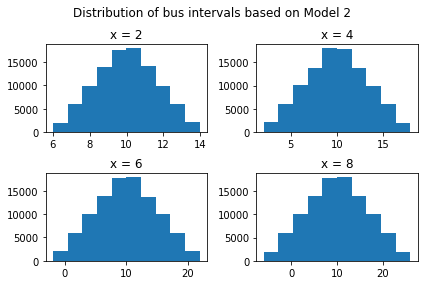

In [29]:
nbus = 100000

S2_1 = Schedule(nbus, model = 2, x = 2)
intv2_1 = S2_1.get_intervals()

S2_2 = Schedule(nbus, model = 2, x = 4)
intv2_2 = S2_2.get_intervals()

S2_3 = Schedule(nbus, model = 2, x = 6)
intv2_3 = S2_3.get_intervals()

S2_4 = Schedule(nbus, model = 2, x = 8)
intv2_4 = S2_4.get_intervals()

fig, ax = plt.subplots(2,2)

ax[0, 0].hist(intv2_1)
ax[0, 0].set_title('x = 2')
ax[0, 1].hist(intv2_2)
ax[0, 1].set_title('x = 4')
ax[1, 0].hist(intv2_3)
ax[1, 0].set_title('x = 6')
ax[1, 1].hist(intv2_4)
ax[1, 1].set_title('x = 8')

fig.suptitle('Distribution of bus intervals based on Model 2')
fig.tight_layout()
fig.subplots_adjust(top=0.85)

plt.show()

Repeating the experiment many times for different values of x, we see that there is no change in the distribution of bus interval, i.e. they all follow the normal distribution with the mean value equals to 10. The range, however, increases as x increases. This is expected since x represents the 'lateness' of the bus and with larger x comes larger variability as the bus arrival time strain away from their schedule.

### Model 3

In [31]:
std_ls = np.linspace(0, 8, 101)
avg_wt = np.zeros(len(std_ls))
nbus = 100

i = 0
while i < len(std_ls):
    S3 = Schedule(nbus, model = 3, std = std_ls[i])
    awt = S3.average_waiting_time()
    avg_wt[i] = awt
    i += 1

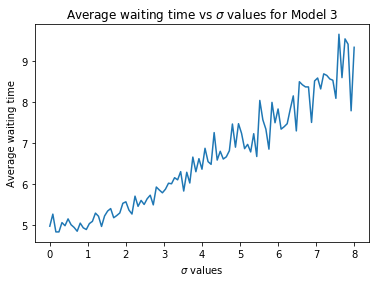

In [33]:
plt.plot(std_ls, avg_wt)
plt.xlabel('$\sigma$ values')
plt.ylabel('Average waiting time')
plt.title('Average waiting time vs $\sigma$ values for Model 3')
plt.show()

Once again, despite the fluctuations, we see a clear trend that with the average waiting time increases with larger values of $\sigma$ .

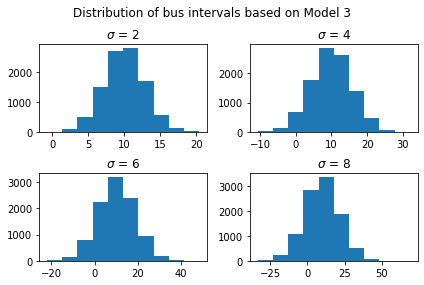

In [34]:
nbus = 10000

S3_1 = Schedule(nbus, model = 3, std = 2)
intv3_1 = S3_1.get_intervals()

S3_2 = Schedule(nbus, model = 3, std = 4)
intv3_2 = S3_2.get_intervals()

S3_3 = Schedule(nbus, model = 3, std = 6)
intv3_3 = S3_3.get_intervals()

S3_4 = Schedule(nbus, model = 3, std = 8)
intv3_4 = S3_4.get_intervals()

fig, ax = plt.subplots(2,2)

ax[0, 0].hist(intv3_1)
ax[0, 0].set_title('$\sigma$ = 2')

ax[0, 1].hist(intv3_2)
ax[0, 1].set_title('$\sigma$ = 4')

ax[1, 0].hist(intv3_3)
ax[1, 0].set_title('$\sigma$ = 6')

ax[1, 1].hist(intv3_4)
ax[1, 1].set_title('$\sigma$ = 8')

fig.suptitle('Distribution of bus intervals based on Model 3')
fig.tight_layout()
fig.subplots_adjust(top=0.85)

plt.show()

Repeating the experiment many times with different values of $\sigma$, we see that the distribution of bus intervals based on Model 3 all follow the normal distribution with a mean value of 10. The trend persists from Model 2 that with larger values of $\sigma$, the range of the distribution becomes wider. This is, once again, expected as a larger standard deviation indicates that the data is more spreaded out about the mean. 

However, we do see a larger range for the distribution (the smallest value and largest value strain far away from each other) and the curves also appear to be narrower and tall about about the mean comparing to model 2.

## 2.3. Compare to real-world bus data

In [35]:
data1 = pd.read_csv('Route_1_minutes_late.csv', 
                    header = None, encoding = 'latin1')
data1.rename(columns={0: 'Minutes Late'}, inplace = True)

data2 = pd.read_csv('Route_2_minutes_late.csv', 
                    header = None, encoding = 'latin1')
data2.rename(columns={0: 'Minutes Late'}, inplace = True)

In [36]:
minutes = data1['Minutes Late']
minutes2 = data2['Minutes Late']

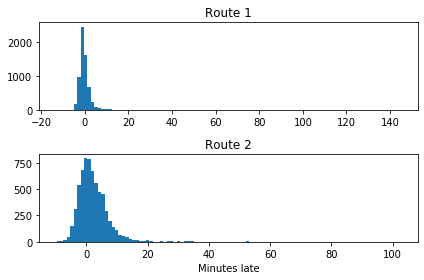

In [37]:
fig, ax = plt.subplots(2)

ax[0].hist(minutes, bins = 100)
ax[0].set_title('Route 1')
ax[1].hist(minutes2, bins = 100)
ax[1].set_title('Route 2')
ax[1].set_xlabel('Minutes late')

fig.tight_layout()
plt.show()

It appears that the minutes late in route 2 follows a **normal distribution** despite a great range of outliers (it can be due to engine failures, bad weather conditions or traffic). By limiting the range, we see that the majoiry of values fall between -5 to 5, meaning that the buses on route 2 usually arrive at the bus stop 5 minutes early to 5 minutes late. 

The same can be said about route 1. However, analysis for both routes must be made with careful considerations since the histograms are slightly skewed to the right (when ranges are limited). A closer look to the distributions are provided as follows:

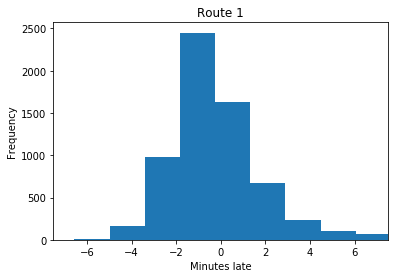

In [114]:
plt.hist(minutes, bins = 100)
plt.xlim([-7.5, 7.5])
plt.title('Route 1')
plt.xlabel('Minutes late')
plt.ylabel('Frequency')
plt.show()

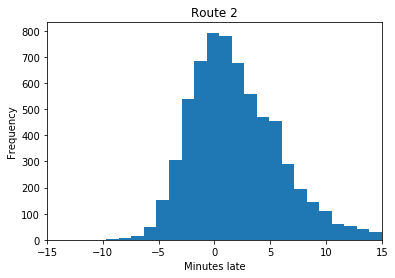

In [116]:
plt.hist(minutes2, bins = 100)
plt.xlim([-15, 15])
plt.title('Route 2')
plt.xlabel('Minutes late')
plt.ylabel('Frequency')
plt.show()

By construction, we know that the lateness of buses arrivals in Model 2 follows a uniform distribution so we can safely conclude that **model 2 is not the best fit for real-world data**. Now we need to consider model 1 and model 3. For model 1:

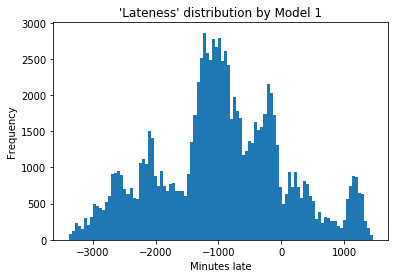

In [170]:
nbus = 100000
S1_ = Schedule(nbus, model = 1)
sched = S1_.get_schedule()

minutes_late1 = np.zeros(nbus)

time = np.arange(0, nbus*10+1, 10)

for i in range(nbus):
    late = sched[i] - time[i]
    minutes_late1[i] = late

plt.hist(minutes_late1, bins = 100)
plt.xlabel('Minutes late')
plt.ylabel('Frequency')
plt.title("'Lateness' distribution by Model 1")
plt.show()

Running multiple experiments, we cannot derive a distribution for model 1 as there are too much variability in the construction of a bus schedule following model 1. We now consider model 3:

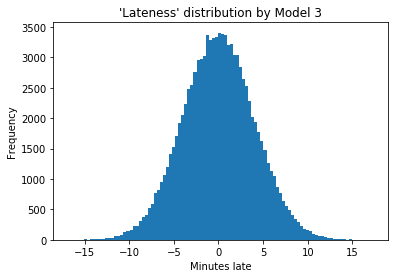

In [168]:
nbus = 100000
S3_ = Schedule(nbus, model = 3, std = 4)
sched = S3_.get_schedule()

minutes_late = np.zeros(nbus)

time = np.arange(0, nbus*10+1, 10)

for i in range(nbus):
    late = time[i] - sched[i]
    minutes_late[i] = late
    
plt.hist(minutes_late, bins = 100)
plt.xlabel('Minutes late')
plt.ylabel('Frequency')
plt.title("'Lateness' distribution by Model 3")
plt.show()

A closer estimation for real-world data would be model 3 with a standard deviation of 4 as it provides a set of data following a normal distribution (by construction) with the majority ranging from -5 to 5. 

## 2.4. Analysis on waiting time

From above, we have chosen model 3 to be the best fit for our real-world data. Based on our analysis from part 2(ii), we saw that the average waiting time for people for Model 3 was approximately 6.3843 minutes. However, we can repeat the experiment many times for verification:

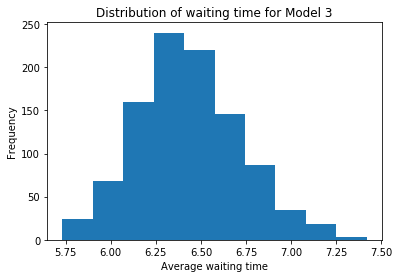

In [191]:
nbus = 100
nexp = 1000
sigma = 4

wt3 = np.zeros(nexp)

for i in range(nexp):
    S3_ = Schedule(nbus, model = 3, std = sigma)
    awt = S3_.average_waiting_time()
    wt3[i] = awt

plt.hist(wt3)
plt.xlabel('Average waiting time')
plt.ylabel('Frequency')
plt.title('Distribution of waiting time for Model 3')
plt.show()

In [193]:
print('Average waiting time for model 3: {:.3f}'.format(np.mean(wt3)))
print('Standard deviation: {:.3f}'.format(np.std(wt3)))

Average waiting time for model 3: 6.432
Standard deviation: 0.282


Thus, we can expect a new waiting time of 6.432 $\pm$ 0.282 minutes.